# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 1, Exercise 1: The Data Science Process


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

---

## Title :
Exercise: The Data Science Process

## Description :
The aim of this exercise is to understand all the steps involved in a Data Science setting.

<img src="../fig/fig1.png" style="width: 500px;">

## Data Description:
Hubway was metro-Boston’s public bike share program, with more than 1600 bikes at 160+ stations across the Greater Boston area. Hubway was owned by four municipalities in the area.

By 2016, Hubway operated 185 stations and 1750 bicycles, with 5 million rides since launching in 2011.

In April 2017, Hubway held a Data Visualization Challenge at the Microsoft NERD Center in Cambridge, releasing 5 years of trip data.

## Instructions:
- Read the data files hubway_stations.csv and hubway_trips.csv into separate pandas dataframes.
- Get a quick understanding of the columns present in the data and their types.
- Remove all the data points with null values in any one (or more) of the columns.
- Create a new column age that gives the age of the rider using their birth date.
- Perform relevant EDA to answer the questions asked on the scaffold.
- Create a simple linear model to predict the number of checkouts based on the distance of the bikes from the centre of the city.
- Visualize the prediction against the data.

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html?highlight=describe#pandas.Series.describe" target="_blank">pd.describe()</a> 
Generates descriptive statistics of the dataframe.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna" target="_blank">pd.dropna()</a>
Removes missing values from the dataframe. It removes either the columns or rows based on the axis parameter.

In [1]:
import os
os.chdir("C:/Users/Araceli/OneDrive v - ETH Zurich/Documentos/ARACELI OTROS/GitHub/2021-CS109A/content/lectures/lecture01")


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from notes.helper import get_distance
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [4]:
# Read the data from the file "hubway_stations.csv"
stations = pd.read_csv("data\hubway_stations.csv")

# Read the data from the file "hubway_trips.csv"
trips = pd.read_csv("data\hubway_trips.csv")


In [5]:
# Take a quick look at the stations data
stations.head()


,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [6]:
# Take a quick look at the trips data
trips.head()


,Unnamed: 0,hubway_id,duration,start_date,strt_statn,end_date,end_statn,zip_code,birth_date,gender
0,426015,482077,675,8/18/2012 19:48:00,8.0,8/18/2012 20:00:00,8.0,'02134,1983.0,Male
1,193080,220612,204,4/26/2012 18:14:00,31.0,4/26/2012 18:17:00,64.0,'02210,1953.0,Male
2,530051,598721,888,9/23/2012 09:26:00,39.0,9/23/2012 09:41:00,39.0,'02118,1985.0,Male
3,484594,547645,526,9/8/2012 12:55:00,88.0,9/8/2012 13:04:00,72.0,'02139,1985.0,Male
4,291265,332163,554,6/21/2012 18:53:00,47.0,6/21/2012 19:02:00,54.0,'02113,1986.0,Female


### **UNDERSTANDING THE DATA**

It is important to completely understand all the information provided in the data. The first step for this is to take a closer look at all the columns and understand their types.

In [7]:
# Getting the data type of each column in the stations data
stations.dtypes


id             int64
terminal      object
station       object
municipal     object
lat          float64
lng          float64
status        object
dtype: object

In [8]:
# Getting the data type of each column in the trips data
trips.dtypes


Unnamed: 0      int64
hubway_id       int64
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
zip_code       object
birth_date    float64
gender         object
dtype: object

### ⏸ Based on the datatypes, do you see any possible issues?

In [9]:
### edTest(test_chow0) ###
# Submit the questions as a string below. Separate each question by an eroteme (question mark) 
answer0 = 'Yes'


In [10]:
# Getting some statistical information from the stations data
stations.describe()


,id,lat,lng
count,142.000000,142.000000,142.000000
mean,74.323944,42.354820,-71.089087
std,41.389098,0.020089,0.027111
min,3.000000,42.309467,-71.146452
25%,39.250000,42.341652,-71.113183
50%,74.500000,42.353373,-71.089191
75%,109.750000,42.366265,-71.065210
max,145.000000,42.404490,-71.035705


In [11]:
# Getting some statistical information from the trips data
trips.describe()


,Unnamed: 0,hubway_id,duration,strt_statn,end_statn,birth_date
count,210239.000000,210239.000000,2.102390e+05,210239.000000,210239.000000,210239.000000
mean,283491.142771,321401.542806,7.794459e+02,36.727567,36.662261,1976.285594
std,153204.497985,173059.875974,1.349006e+04,18.592716,18.551934,11.002281
min,0.000000,8.000000,0.000000e+00,3.000000,3.000000,1932.000000
25%,153899.000000,174103.000000,3.460000e+02,22.000000,22.000000,1969.000000
50%,280081.000000,319856.000000,5.320000e+02,38.000000,38.000000,1979.000000
75%,414740.000000,469290.000000,8.280000e+02,50.000000,50.000000,1985.000000
max,549285.000000,620312.000000,5.351083e+06,98.000000,98.000000,1995.000000


### ⏸ Based on your understanding of the data, what questions would you like to have answered?

In [12]:
### edTest(test_chow1) ###
# Submit the questions as a string below. Separate each question by an eroteme (question mark) 
answer1 = 'Most common station, Who take more trips (male or female)'


### **DATA PRE-PROCESSING**

Let us clean the data before breaking it down further. There are many pre-processing techqniues which will be covered later in the course.


In [13]:
# Delete all the rows of the stations dataframe with null values 
# axis=0 indicates that the rows with null values are to be deleted
stations.dropna(axis=0, inplace=True)


In [14]:
# Delete all the rows of the trips dataframe with null values 
trips.dropna(axis=0, inplace=True)


In [15]:
# Create a new column that gives the age of each rider
age_col = 2021.0 - trips['birth_date'].values

# Add the age column to the trips dataframe
trips['age'] = age_col

# Drop the 'birth_date' column
trips.drop('birth_date', axis=1, inplace=True)


### **EXPLORATORY DATA ANALYSIS (EDA)**

As you would have noticed, the information extracted above is not sufficient to answer most of the questions and is definitely not sufficient to ask relevant questions. Hence, we will need to perform additional data analysis. 



c:\Users\Araceli\Anaconda3\envs\CS109A\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


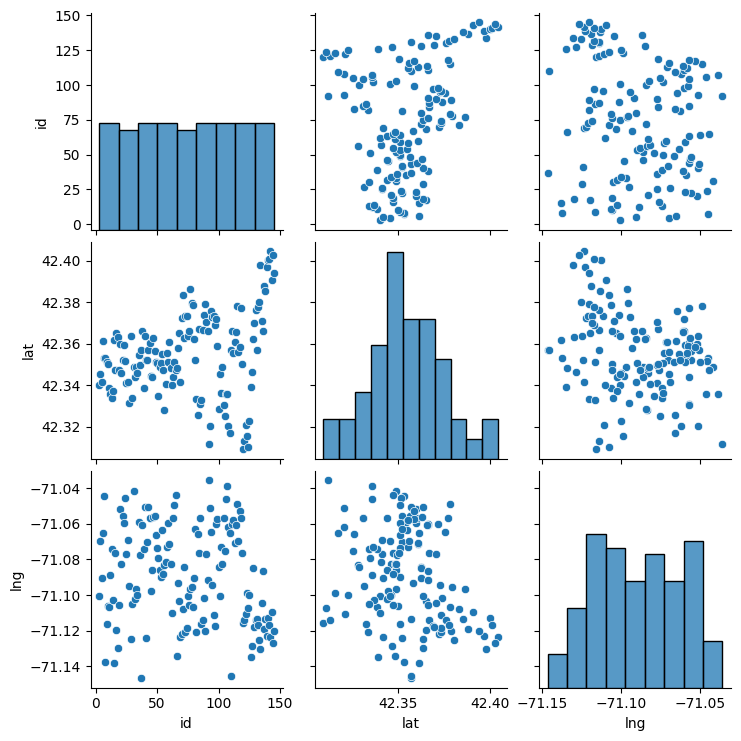

In [16]:
# Find out if there is any relation between the predictors of the stations data
sns.pairplot(stations);


### ⏸ Based on the plot above, do you notice any recognizable relationship between any of the columns?

#### A. The latitude and longitude are directly proportional to each other.
#### B. The latitude and longitude are inversely proportional to each other.
#### C. It is random. There seems to be no relation between the latitude and longitude.



In [17]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'C'


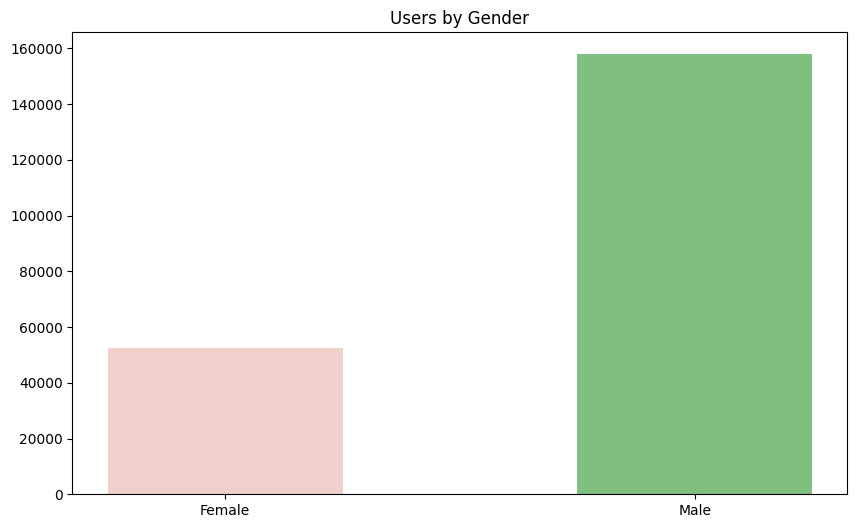

In [18]:
# Get the unique number of male and female bike riders
gender_counts = np.unique(trips['gender'].values, return_counts=True)

# Plotting the genders of riders as a histogram
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(range(2), width=0.5, height = gender_counts[1],color=['#e4a199', 'green'], alpha=0.5 )
ax.set_xticks([0, 1])
ax.set_xticklabels(gender_counts[0])
ax.set_title('Users by Gender');


### ⏸ Based on the plot above, who uses the bikes more, men or women?
#### A. Women
#### B. Men
#### C. Can't say

In [19]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'B'


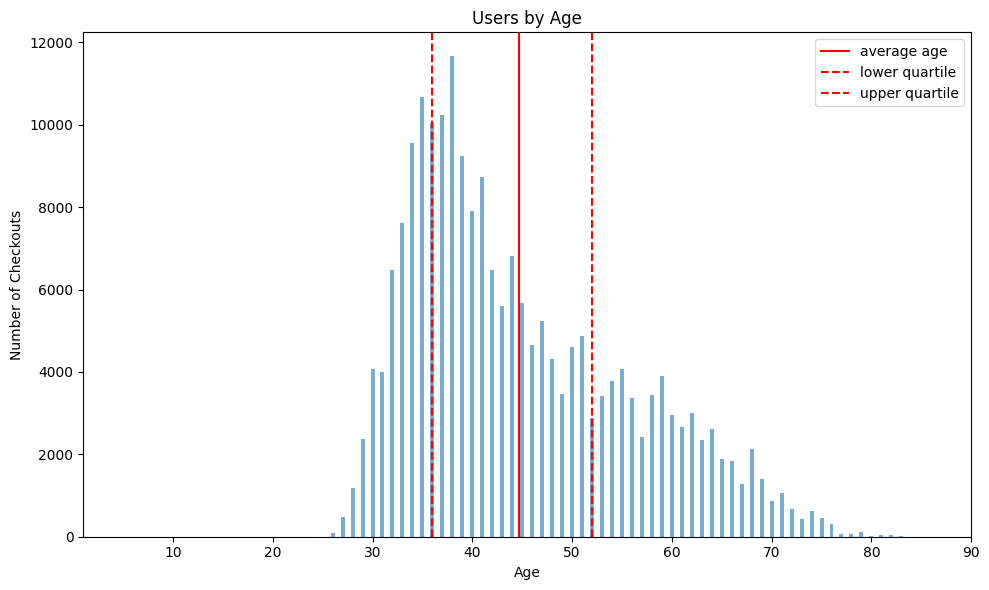

In [22]:
# Plotting the usage of bikes based on the ages of riders
fig, ax = plt.subplots(1,1, figsize=(10, 6))
age_counts = np.unique(trips['age'], return_counts=True)
ax.bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6)
ax.axvline(x=np.mean(age_col), color='red', label='average age')
ax.axvline(x=np.percentile(age_col, 25), color='red', linestyle='--', label='lower quartile')
ax.axvline(x=np.percentile(age_col, 75), color='red', linestyle='--', label='upper quartile')
ax.set_xlim([1, 90])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Checkouts')
ax.legend()
ax.set_title('Users by Age')
plt.tight_layout()


### ⏸ Based on the plot above, who uses the bikes more, older or younger people?
#### A. Older
#### B. Younger

In [24]:
### edTest(test_chow4) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer4 = 'B'


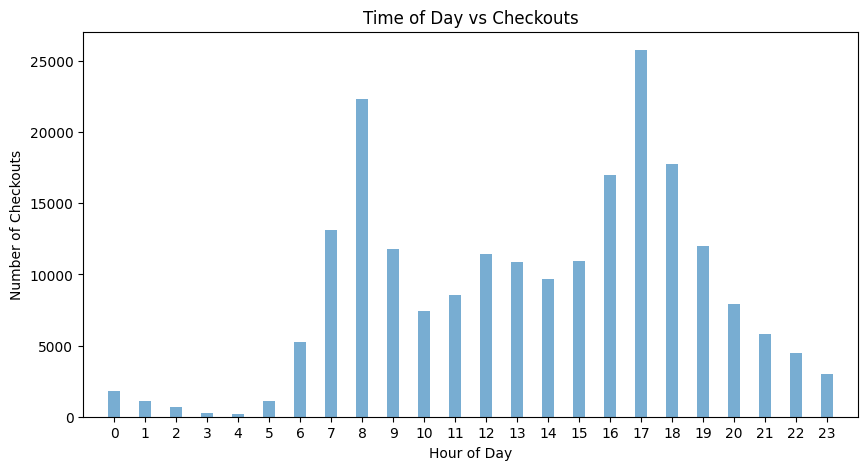

In [25]:
# Get the hourwise bike checkouts
check_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6]))

# Plotting the bike checkouts hourwise
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')
plt.show()


### ⏸ Based on the plot above, when is the biggest rush hour?

In [28]:
### edTest(test_chow5) ###
# Submit the integer value below within the quotes
answer5 = '17'


Text(0.5, 1.0, 'Cities')

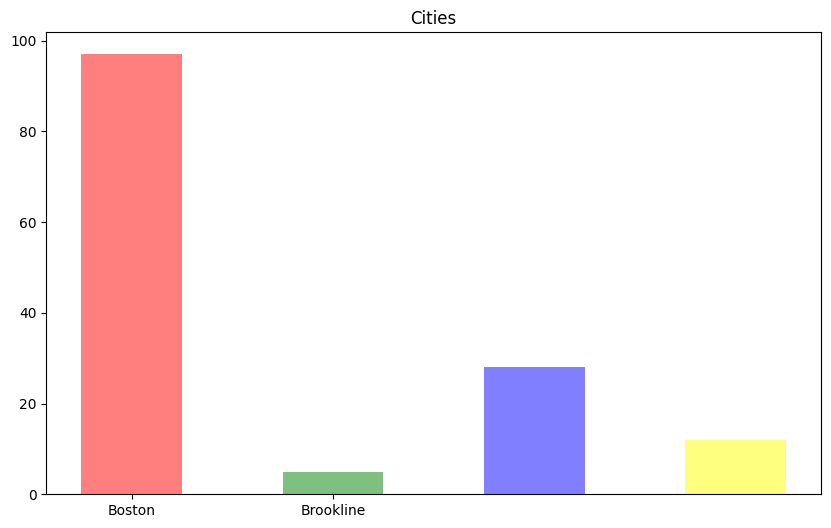

In [34]:
# Get the unique number of cities of the rides
cities_counts = np.unique(stations['municipal'].values, return_counts=True)

# Plotting the cities of riders as a histogram
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(cities_counts[0], width=0.5, height = cities_counts[1],color=['red', 'green','blue','yellow'], alpha=0.5 )
ax.set_xticks([0, 1])
# ax.set_xticklabels(cities_counts[0])
ax.set_title('Cities')

In [45]:
trips['end_date']

0        2012-08-18 20:00:00
1        2012-04-26 18:17:00
2        2012-09-23 09:41:00
3        2012-09-08 13:04:00
4        2012-06-21 19:02:00
                 ...        
210234   2011-11-11 16:27:00
210235   2012-08-02 11:57:00
210236   2012-06-19 07:09:00
210237   2011-11-09 17:50:00
210238   2012-08-31 08:46:00
Name: end_date, Length: 210239, dtype: datetime64[ns]

In [47]:
trips['end_date'] = pd.to_datetime(trips['end_date'])
day_of_week = trips['end_date'].dt.dayofweek
trips['type_day'] = day_of_week.apply(lambda day: 'Weekends' if day >= 5 else 'Weekdays')

Text(0.5, 1.0, 'Weekdays vs. Weekends')

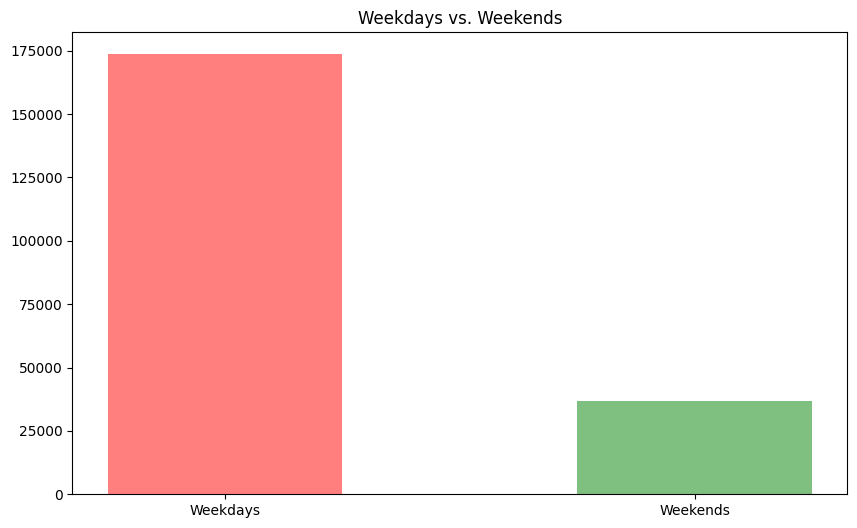

In [48]:
# Get the unique number of weekends and weekdays
daytype_counts = np.unique(trips['type_day'].values, return_counts=True)

# Plotting the type of day of the rides as a histogram
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(daytype_counts[0], width=0.5, height = daytype_counts[1],color=['red', 'green'], alpha=0.5 )
ax.set_xticks([0, 1])
ax.set_title('Weekdays vs. Weekends')

#### MORE QUESTIONS?

There are many questions that haven't been covered here. 
1. For what reasons are the bikes being used? Recreation, traffic or for health benfits?
2. Is the usage more during the weekdays or weekends?
3. Are people using bikes more in Boston or Cambridge?

Feel free to add new code cells and find the answers.

### **DATA MODELLING** 
There are some questions that cannot be answered with simple graphing techniques. It requires combining different variables.

1. How does user demographics impact the duration the bikes are being used? Or where they are being checked out?
2. How does weather or traffic conditions impact bike usage?
3. How do the characteristics of the station location affect the number of bikes being checked out?



Let us try to answer the question: *How does the distance from the center of the city affect the bike usage?* 

In [49]:
stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [57]:
# Helper function within helper.py to compute the distance of the bike from the city center
# It returns a dataframe that has the column of the checkout distance from the center
counts_df = get_distance()

# Take a quick look at the dataframe
counts_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'hubway_stations.csv'

In [33]:
# Let us use a straight line y = ax + b to model the relation 
# between the number of checkouts and distance to the city center

beta0 = 4394
beta1 = -1175

y_pred = beta0 + beta1 * counts_df['dist_to_center'].values


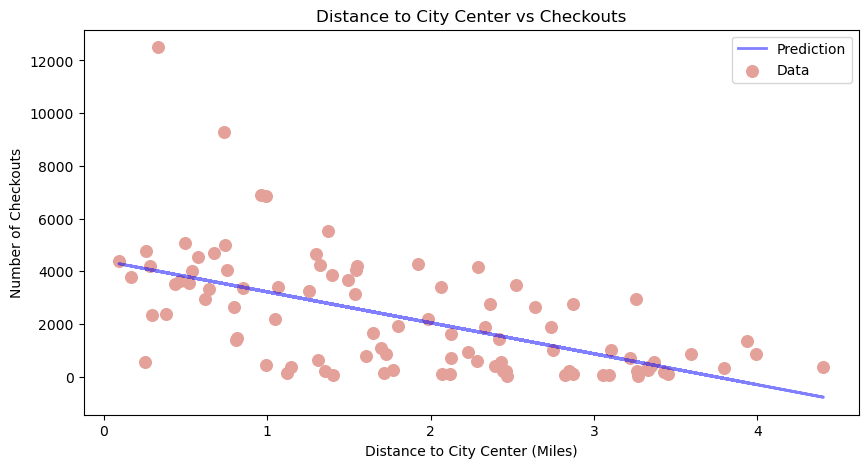

In [34]:
# Plotting the true data and the prediction
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(counts_df['dist_to_center'].values, counts_df['checkouts'].values, label='Data', s=70, c='#e4a199')
ax.plot(counts_df['dist_to_center'].values, y_pred, c='blue', alpha=0.5, linewidth=2, label='Prediction')
ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts');
ax.legend();


### ⏸ Based on our "linear" model, what would most likely be the number of checkouts for a distance of 2.5 miles from the city center?
#### A. 45000
#### B. 12530
#### C. 1450
#### D. 650

In [35]:
### edTest(test_chow6) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer6 = 'C'
